In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from analysis import *                                  # importing the self designed toolkit/ package
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 185)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# List of file names
file_names = ['metro-trips-2022-q1.csv', 'metro-trips-2022-q2.csv', 
              'metro-trips-2022-q3.csv', 'metro-trips-2022-q4.csv']

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through file names and read CSV files into DataFrames
for file_name in file_names:
    df = pd.read_csv(file_name, parse_dates=['start_time', 'end_time'])
    dataframes.append(df)

# Concatenate DataFrames along rows to create a single merged DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Print the first few rows of the merged DataFrame
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,179409976,20,2022-01-01 00:11:00,2022-01-01 00:31:00,3011,34.04,-118.27,3005,34.05,-118.26,14027,1,One Way,One Day Pass,standard
1,179410076,9,2022-01-01 00:31:00,2022-01-01 00:40:00,3010,34.04,-118.25,4475,34.05,-118.24,13902,1,One Way,Walk-up,standard
2,179410278,7,2022-01-01 00:39:00,2022-01-01 00:46:00,4210,33.98,-118.47,4214,34.00,-118.48,13928,365,One Way,Annual Pass,standard
3,179410276,5,2022-01-01 00:42:00,2022-01-01 00:47:00,3005,34.05,-118.26,3063,34.05,-118.25,14027,1,One Way,One Day Pass,standard
4,179411477,12,2022-01-01 00:55:00,2022-01-01 01:07:00,4534,34.10,-118.33,4442,34.10,-118.30,20162,365,One Way,Annual Pass,standard


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290310 entries, 0 to 290309
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              290310 non-null  int64         
 1   duration             290310 non-null  int64         
 2   start_time           290310 non-null  datetime64[ns]
 3   end_time             290310 non-null  datetime64[ns]
 4   start_station        290310 non-null  int64         
 5   start_lat            290274 non-null  float64       
 6   start_lon            290274 non-null  float64       
 7   end_station          290310 non-null  int64         
 8   end_lat              284355 non-null  float64       
 9   end_lon              284354 non-null  float64       
 10  bike_id              290310 non-null  object        
 11  plan_duration        290310 non-null  int64         
 12  trip_route_category  290310 non-null  object        
 13  passholder_typ

In [4]:
# List of columns to convert to categorical
categorical_columns = ['trip_id', 'bike_id', 'plan_duration',
                       'trip_route_category', 'passholder_type', 'bike_type']

# Convert columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

# Print data types after conversion
print(df.dtypes)

trip_id                      category
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                      category
plan_duration                category
trip_route_category          category
passholder_type              category
bike_type                    category
dtype: object


In [5]:
# Extract month from 'start_time'
df['start_month'] = df['start_time'].dt.month_name()
df['start_month'] = df['start_month'].astype('category')

df['start_day'] = df['start_time'].dt.day_name()
df['start_day'] = df['start_day'].astype('category')

df['start_hour'] = df['start_time'].dt.hour
df['start_hour'] = df['start_hour'].astype('category')

df['end_hour'] = df['end_time'].dt.hour
df['end_hour'] = df['end_hour'].astype('category')

In [6]:
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_month,start_day,start_hour,end_hour
0,179409976,20,2022-01-01 00:11:00,2022-01-01 00:31:00,3011,34.04,-118.27,3005,34.05,-118.26,14027,1,One Way,One Day Pass,standard,January,Saturday,0,0
1,179410076,9,2022-01-01 00:31:00,2022-01-01 00:40:00,3010,34.04,-118.25,4475,34.05,-118.24,13902,1,One Way,Walk-up,standard,January,Saturday,0,0
2,179410278,7,2022-01-01 00:39:00,2022-01-01 00:46:00,4210,33.98,-118.47,4214,34.00,-118.48,13928,365,One Way,Annual Pass,standard,January,Saturday,0,0
3,179410276,5,2022-01-01 00:42:00,2022-01-01 00:47:00,3005,34.05,-118.26,3063,34.05,-118.25,14027,1,One Way,One Day Pass,standard,January,Saturday,0,0
4,179411477,12,2022-01-01 00:55:00,2022-01-01 01:07:00,4534,34.10,-118.33,4442,34.10,-118.30,20162,365,One Way,Annual Pass,standard,January,Saturday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290305,231772762,15,2022-12-31 22:14:00,2022-12-31 22:29:00,3008,34.05,-118.26,3063,34.05,-118.25,22873,1,One Way,Walk-up,electric,December,Saturday,22,22
290306,231773363,27,2022-12-31 22:32:00,2022-12-31 22:59:00,3035,34.05,-118.26,3046,34.05,-118.30,24375,1,One Way,Walk-up,electric,December,Saturday,22,22
290307,231773162,10,2022-12-31 22:38:00,2022-12-31 22:48:00,4587,34.06,-118.31,4410,34.06,-118.24,12280,30,One Way,Monthly Pass,standard,December,Saturday,22,22
290308,231780463,4,2022-12-31 23:52:00,2022-12-31 23:56:00,4491,34.05,-118.25,4475,34.05,-118.24,19996,30,One Way,Monthly Pass,standard,December,Saturday,23,23


In [7]:
df.drop(["start_lat","start_lon","end_lat","end_lon"], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290310 entries, 0 to 290309
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              290310 non-null  category      
 1   duration             290310 non-null  int64         
 2   start_time           290310 non-null  datetime64[ns]
 3   end_time             290310 non-null  datetime64[ns]
 4   start_station        290310 non-null  int64         
 5   end_station          290310 non-null  int64         
 6   bike_id              290310 non-null  category      
 7   plan_duration        290310 non-null  category      
 8   trip_route_category  290310 non-null  category      
 9   passholder_type      290152 non-null  category      
 10  bike_type            290310 non-null  category      
 11  start_month          290310 non-null  category      
 12  start_day            290310 non-null  category      
 13  start_hour    

In [9]:
# self designed analysis package
analysis(df,20)


First 5 samples/rows 



,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_month,start_day,start_hour,end_hour
0,179409976,20,2022-01-01 00:11:00,2022-01-01 00:31:00,3011,3005,14027,1,One Way,One Day Pass,standard,January,Saturday,0,0
1,179410076,9,2022-01-01 00:31:00,2022-01-01 00:40:00,3010,4475,13902,1,One Way,Walk-up,standard,January,Saturday,0,0
2,179410278,7,2022-01-01 00:39:00,2022-01-01 00:46:00,4210,4214,13928,365,One Way,Annual Pass,standard,January,Saturday,0,0
3,179410276,5,2022-01-01 00:42:00,2022-01-01 00:47:00,3005,3063,14027,1,One Way,One Day Pass,standard,January,Saturday,0,0
4,179411477,12,2022-01-01 00:55:00,2022-01-01 01:07:00,4534,4442,20162,365,One Way,Annual Pass,standard,January,Saturday,0,1


---------------------------------------------------------

Last 5 samples/rows 



,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_month,start_day,start_hour,end_hour
290305,231772762,15,2022-12-31 22:14:00,2022-12-31 22:29:00,3008,3063,22873,1,One Way,Walk-up,electric,December,Saturday,22,22
290306,231773363,27,2022-12-31 22:32:00,2022-12-31 22:59:00,3035,3046,24375,1,One Way,Walk-up,electric,December,Saturday,22,22
290307,231773162,10,2022-12-31 22:38:00,2022-12-31 22:48:00,4587,4410,12280,30,One Way,Monthly Pass,standard,December,Saturday,22,22
290308,231780463,4,2022-12-31 23:52:00,2022-12-31 23:56:00,4491,4475,19996,30,One Way,Monthly Pass,standard,December,Saturday,23,23
290309,231780462,4,2022-12-31 23:52:00,2022-12-31 23:56:00,4491,4475,14007,1,One Way,One Day Pass,standard,December,Saturday,23,23


---------------------------------------------------------

There are 290310 samples and 15 features in the dataset 

---------------------------------------------------------

Basic information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290310 entries, 0 to 290309
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              290310 non-null  category      
 1   duration             290310 non-null  int64         
 2   start_time           290310 non-null  datetime64[ns]
 3   end_time             290310 non-null  datetime64[ns]
 4   start_station        290310 non-null  int64         
 5   end_station          290310 non-null  int64         
 6   bike_id              290310 non-null  category      
 7   plan_duration        290310 non-null  category      
 8   trip_route_category  290310 non-null  category      
 9   passholder_type      290152 non-

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

passholder_type    158
dtype: int64

In [11]:
null_pass = df[df["passholder_type"].isnull()]
null_pass.head()

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_month,start_day,start_hour,end_hour
4374,180088487,3,2022-01-09 19:16:00,2022-01-09 19:19:00,3031,4491,12222,365,One Way,NaN,standard,January,Sunday,19,19
4386,180088478,3,2022-01-09 19:39:00,2022-01-09 19:42:00,4491,3031,16750,365,One Way,NaN,electric,January,Sunday,19,19
5835,180318176,8,2022-01-12 14:06:00,2022-01-12 14:14:00,3031,3031,5815,365,Round Trip,NaN,standard,January,Wednesday,14,14
7863,180639477,7,2022-01-16 11:28:00,2022-01-16 11:35:00,3031,3069,20263,365,One Way,NaN,standard,January,Sunday,11,11
8006,180646178,5,2022-01-16 13:35:00,2022-01-16 13:40:00,3069,3031,5812,365,One Way,NaN,standard,January,Sunday,13,13


In [12]:
null_pass["plan_duration"].value_counts()

365    158
1        0
30       0
999      0
Name: plan_duration, dtype: int64

In [13]:
df.fillna("Annual Pass", inplace=True)

In [14]:
df.isnull().sum().sum()

0

In [15]:
df[(df["passholder_type"]=="Testing") | (df["plan_duration"]==999)]

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_month,start_day,start_hour,end_hour
170097,204007977,23,2022-08-21 10:38:00,2022-08-21 11:01:00,4301,4406,5769,999,One Way,Testing,standard,August,Sunday,10,11
171193,204036674,5,2022-08-21 16:42:00,2022-08-21 16:47:00,4437,4474,22735,999,One Way,Testing,electric,August,Sunday,16,16
174153,204526390,4,2022-08-24 21:55:00,2022-08-24 21:59:00,4474,4452,20010,999,One Way,Testing,standard,August,Wednesday,21,21
174158,204526380,16,2022-08-24 21:59:00,2022-08-24 22:15:00,4452,4437,22048,999,One Way,Testing,electric,August,Wednesday,21,22
174162,204526374,4,2022-08-24 22:16:00,2022-08-24 22:20:00,4437,4474,6032,999,One Way,Testing,standard,August,Wednesday,22,22


In [16]:
# Drop rows based on conditions
df = df.loc[~((df["passholder_type"] == "Testing") | (df["plan_duration"] == 999))]

In [17]:
df.shape

(290305, 15)

<h2>Average length of bike trip?

In [18]:
print("Average bike trip:",round(df.duration.mean(),2),"minutes")

Average bike trip: 39.76 minutes


<h2>Number of trips and percentage trips taken on a monthly basis?

In [19]:
monthly_trips = df["start_month"].value_counts().reset_index()
monthly_trips

,index,start_month
0,October,33391
1,September,29561
2,August,28436
3,July,27169
4,June,24664
5,November,24303
6,May,23777
7,December,22678
8,April,20219
9,March,19661


In [20]:
month_percentage = df["start_month"].value_counts(normalize=True) * 100
month_percentage_formatted = month_percentage.apply(lambda x: f"{x:.2f}%")

print(month_percentage_formatted)

October      11.50%
September    10.18%
August        9.80%
July          9.36%
June          8.50%
November      8.37%
May           8.19%
December      7.81%
April         6.96%
March         6.77%
February      6.35%
January       6.20%
Name: start_month, dtype: object


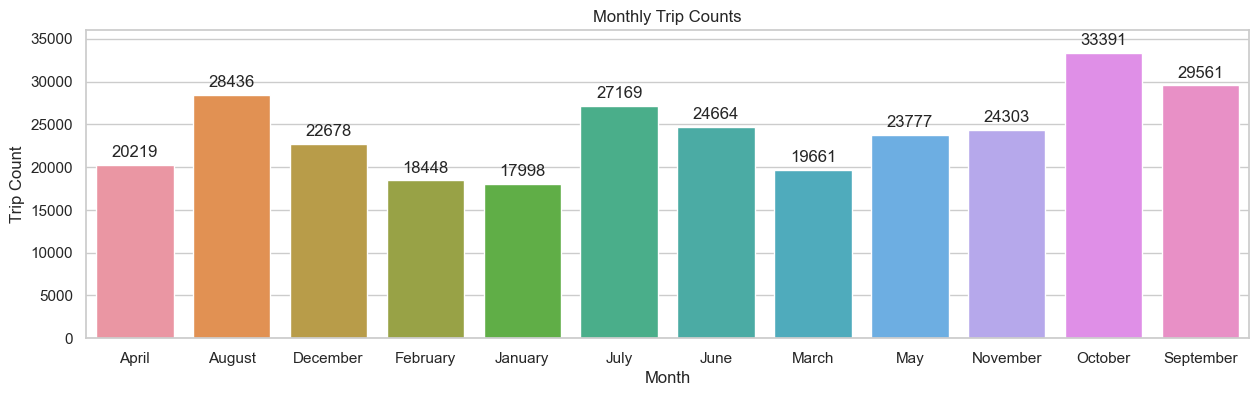

In [21]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 4))  # Adjust the figure size as needed
ax = sns.barplot(monthly_trips, x="index", y="start_month")

# Display values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Adjust the distance of text above the bar
                textcoords='offset points')
    
# Set x-axis limits
ax.set_ylim(0, 36000)  # Adjust the limits as needed


# Set plot title and labels
plt.title("Monthly Trip Counts")
plt.xlabel("Month")
plt.ylabel("Trip Count")

# Show the plot
plt.show()

<h2> Total trips, min/max trip duration, total trip duration and average trip length per 'plan_duration', 'trip_route_category', 'passholder_type' and 'bike_type'?

plan_duration


,count,min,max,sum,mean
plan_duration,,,,,
1,114139,1.00,1440.00,7963576,69.77
30,147512,1.00,1440.00,3095142,20.98
365,28654,1.00,1440.00,482797,16.85
999,0,NaN,NaN,0,NaN



 plan_duration  (%)


,index,plan_duration
0,30,50.81
1,1,39.32
2,365,9.87
3,999,0.00


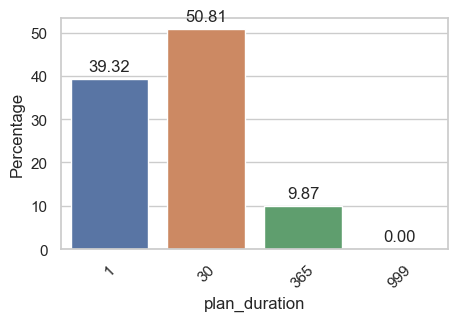




trip_route_category


,count,min,max,sum,mean
trip_route_category,,,,,
One Way,233853,1,1440,7886720,33.73
Round Trip,56452,1,1440,3654795,64.74



 trip_route_category  (%)


,index,trip_route_category
0,One Way,80.55
1,Round Trip,19.45


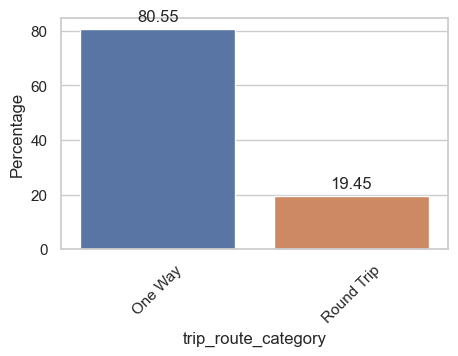




passholder_type


,count,min,max,sum,mean
passholder_type,,,,,
Annual Pass,28273,1.00,1440.00,471790,16.69
Monthly Pass,147497,1.00,1440.00,3094335,20.98
One Day Pass,34221,1.00,1440.00,2629024,76.82
Testing,0,NaN,NaN,0,NaN
Walk-up,80314,1.00,1440.00,5346366,66.57



 passholder_type  (%)


,index,passholder_type
0,Monthly Pass,50.81
1,Walk-up,27.67
2,One Day Pass,11.79
3,Annual Pass,9.74
4,Testing,0.00


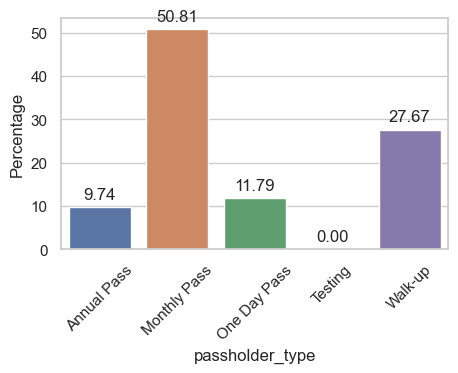




bike_type


,count,min,max,sum,mean
bike_type,,,,,
electric,87195,1,1440,3096462,35.51
smart,16,4,967,1257,78.56
standard,203094,1,1440,8443796,41.58



 bike_type  (%)


,index,bike_type
0,standard,69.96
1,electric,30.04
2,smart,0.01


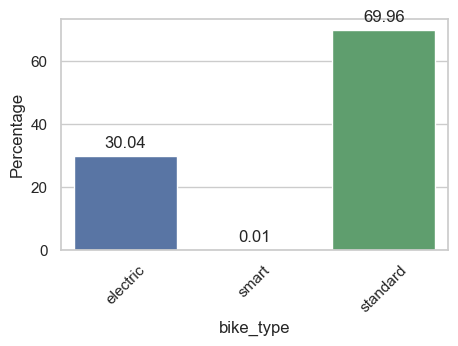

In [22]:
cols = ['plan_duration', 'trip_route_category', 'passholder_type', 'bike_type']

for i in cols:
    print(i)
    display(df.groupby(i)["duration"].agg(["count","min","max","sum","mean"]))
    print("\n",i," (%)")
    plot_data = df[i].value_counts(normalize=True).mul(100).reset_index()
    display(plot_data)
    plt.figure(figsize=(5,3))
    ax = sns.barplot(plot_data, x="index",y=i)
    plt.ylabel("Percentage")
    plt.xlabel(i)

    # Display values on top of bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # Adjust the distance of text above the bar
                    textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.show()
    print("\n\n")

<h2>Compare plan duration and passholder_type?

In [23]:
cross_tab = pd.crosstab(index=df['plan_duration'], columns=df['passholder_type'])

# Print the cross-tabulation
print(cross_tab)

passholder_type  Annual Pass  Monthly Pass  One Day Pass  Walk-up
plan_duration                                                    
1                          0             0         34221    79918
30                         0        147497             0       15
365                    28273             0             0      381


<h2> Rows where passholder_type is "Walk-up" and plan_duration is not 1

In [24]:
df[(df["passholder_type"]=="Walk-up") & ~(df["plan_duration"]==1)]

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_month,start_day,start_hour,end_hour
3333,179973110,44,2022-01-08 10:56:00,2022-01-08 11:40:00,4212,4212,6271,365,Round Trip,Walk-up,standard,January,Saturday,10,11
4023,180062984,16,2022-01-09 13:03:00,2022-01-09 13:19:00,4568,4563,12361,365,One Way,Walk-up,standard,January,Sunday,13,13
6803,180478477,3,2022-01-14 12:15:00,2022-01-14 12:18:00,3007,3005,5816,365,One Way,Walk-up,standard,January,Friday,12,12
6810,180478680,5,2022-01-14 12:22:00,2022-01-14 12:27:00,3005,3075,5816,365,One Way,Walk-up,standard,January,Friday,12,12
6875,180482582,10,2022-01-14 13:42:00,2022-01-14 13:52:00,3075,3007,5816,365,One Way,Walk-up,standard,January,Friday,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287362,230949363,15,2022-12-27 07:27:00,2022-12-27 07:42:00,3064,3022,23438,365,One Way,Walk-up,electric,December,Tuesday,7,7
288101,231188078,98,2022-12-28 13:56:00,2022-12-28 15:34:00,4567,4567,20187,365,Round Trip,Walk-up,standard,December,Wednesday,13,15
289672,231538869,17,2022-12-30 14:41:00,2022-12-30 14:58:00,4567,4555,12393,365,One Way,Walk-up,standard,December,Friday,14,14
289849,231575677,21,2022-12-30 17:28:00,2022-12-30 17:49:00,4555,4567,12393,365,One Way,Walk-up,standard,December,Friday,17,17


<h2> Drop above 396 rows

In [25]:
df = df.drop(df[(df["passholder_type"] == "Walk-up") & ~(df["plan_duration"] == 1)].index)
df.shape

(289909, 15)

In [26]:
cross_tab = pd.crosstab(index=df['plan_duration'], columns=df['passholder_type'])

# Print the cross-tabulation
print(cross_tab)

passholder_type  Annual Pass  Monthly Pass  One Day Pass  Walk-up
plan_duration                                                    
1                          0             0         34221    79918
30                         0        147497             0        0
365                    28273             0             0        0


<h2>What are the peak hours for bike trip departures and returns?

In [27]:
def get_counts(feature):
    # Calculate value counts
    value_counts = df[feature].value_counts()

    # Calculate normalized percentages
    percentages = df[feature].value_counts(normalize=True) * 100

    # Create a DataFrame combining both counts and percentages
    result_df = pd.DataFrame({'Counts': value_counts, 'Percentages': percentages})

    # Print the DataFrame
    display(result_df)

In [28]:
get_counts("start_hour")

,Counts,Percentages
17,25601,8.83
16,24520,8.46
18,24104,8.31
15,23262,8.02
13,22914,7.90
14,22309,7.70
12,22024,7.60
19,19512,6.73
11,19097,6.59
10,14586,5.03


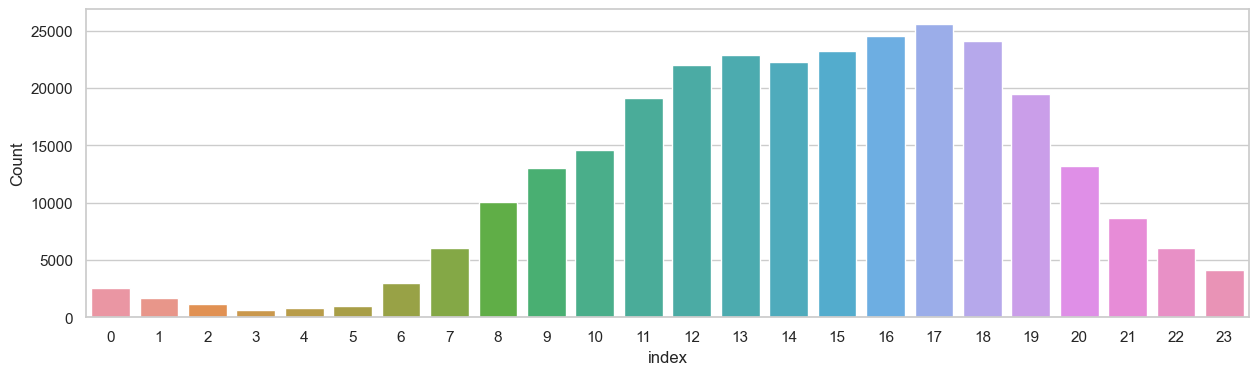

In [29]:
s_hour = df["start_hour"].value_counts().reset_index()

plt.figure(figsize=(15,4))
sns.barplot(s_hour,x="index",y="start_hour")
plt.xlabel="Start Hour"
plt.ylabel("Count")
plt.show()

In [30]:
get_counts("end_hour")

,Counts,Percentages
17,26022,8.98
18,25137,8.67
16,24893,8.59
15,22856,7.88
14,22292,7.69
19,22099,7.62
13,21959,7.57
12,20451,7.05
11,16170,5.58
20,16030,5.53


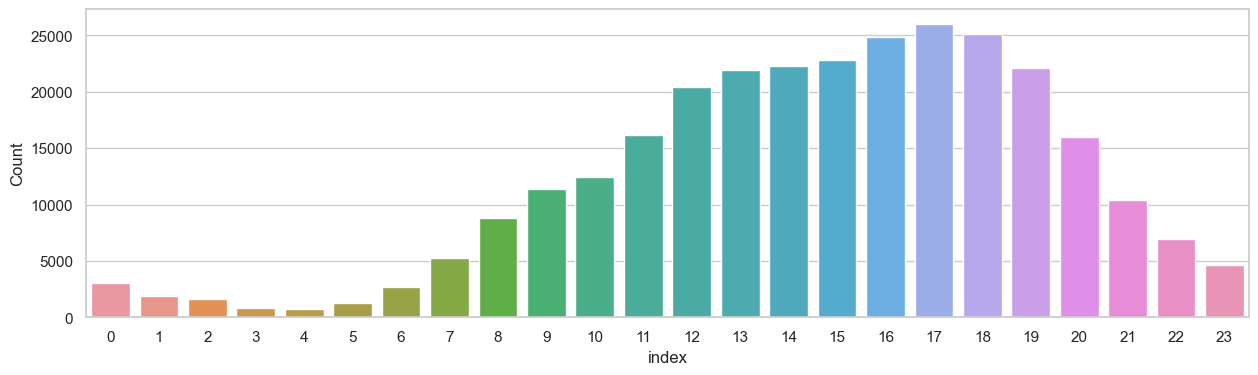

In [31]:
s_hour = df["end_hour"].value_counts().reset_index()

plt.figure(figsize=(15,4))
sns.barplot(s_hour,x="index",y="end_hour")
plt.xlabel="End Hour"
plt.ylabel("Count")
plt.show()

<h2>How does the distribution of trip durations vary across different start and end stations?

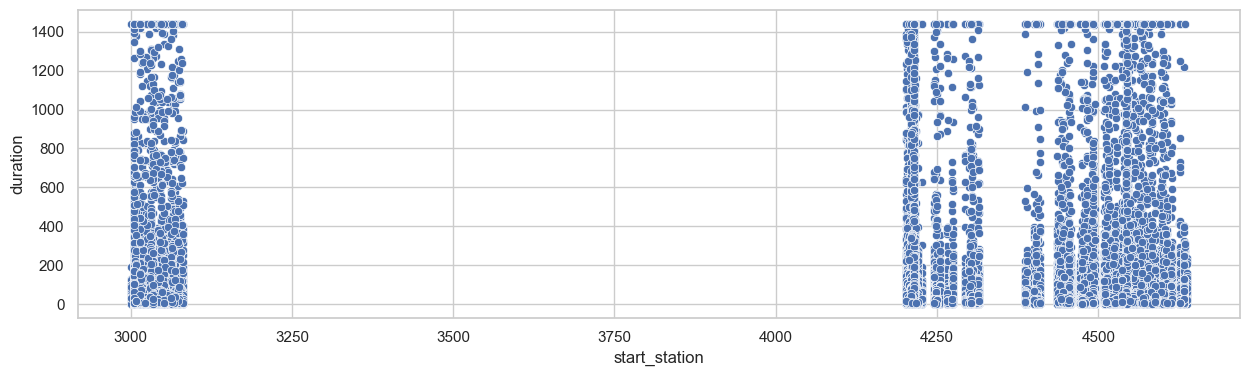

In [32]:
plt.figure(figsize=(15,4))

sns.scatterplot(df, x="start_station", y="duration")
plt.show()

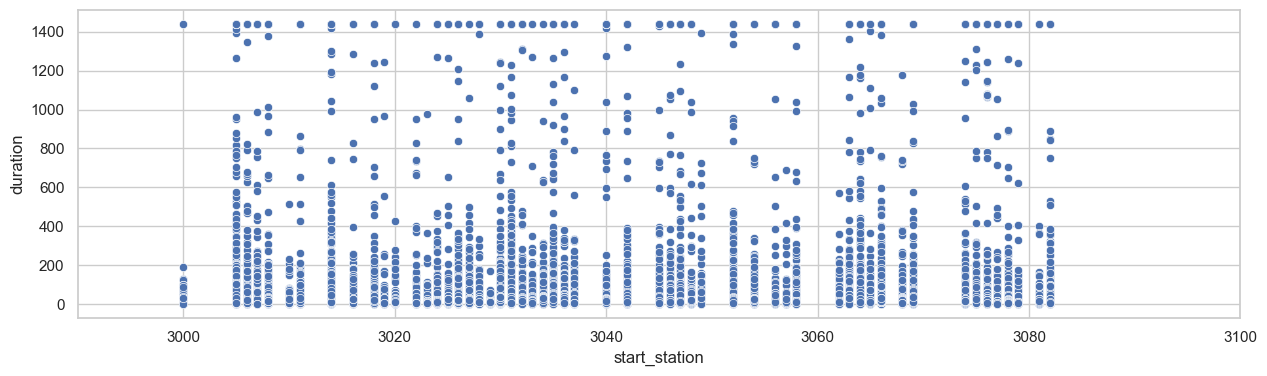

In [33]:
plt.figure(figsize=(15,4))

ax = sns.scatterplot(df, x="start_station", y="duration")

# Set x-axis range
ax.set_xlim(2990, 3100)

plt.show()

In [34]:
df[(df["start_station"]>=2990) & (df["start_station"]<=3100)]["start_station"].nunique()

55

In [35]:
df[(df["start_station"]>=2990) & (df["start_station"]<=3100)]["start_station"].unique()

array([3011, 3010, 3005, 3046, 3023, 3027, 3057, 3008, 3031, 3006, 3035,
       3030, 3014, 3045, 3042, 3054, 3025, 3064, 3024, 3066, 3026, 3069,
       3076, 3018, 3077, 3056, 3028, 3034, 3078, 3074, 3062, 3047, 3068,
       3052, 3082, 3016, 3032, 3037, 3079, 3019, 3058, 3022, 3075, 3063,
       3065, 3040, 3033, 3007, 3049, 3048, 3036, 3020, 3081, 3029, 3000],
      dtype=int64)

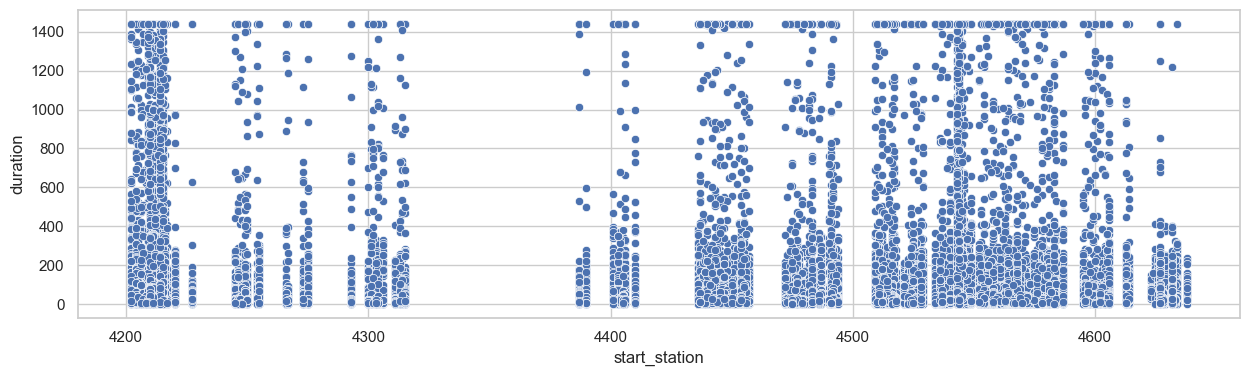

In [36]:
plt.figure(figsize=(15,4))

ax = sns.scatterplot(df, x="start_station", y="duration")

# Set x-axis range
ax.set_xlim(4180, 4660)

plt.show()

In [37]:
df[(df["start_station"]>=4100) & (df["start_station"]<=4660)]["start_station"].nunique()

178

In [38]:
np.sort(df[(df["start_station"]>=4100) & (df["start_station"]<=4660)]["start_station"].unique())

array([4202, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213,
       4214, 4215, 4216, 4217, 4220, 4227, 4245, 4246, 4247, 4248, 4249,
       4250, 4254, 4255, 4266, 4267, 4273, 4275, 4293, 4300, 4301, 4302,
       4303, 4304, 4306, 4311, 4313, 4314, 4315, 4387, 4390, 4401, 4403,
       4404, 4405, 4406, 4410, 4436, 4437, 4438, 4439, 4440, 4441, 4442,
       4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453,
       4454, 4455, 4456, 4457, 4472, 4473, 4474, 4475, 4476, 4477, 4478,
       4479, 4480, 4482, 4483, 4486, 4487, 4490, 4491, 4492, 4493, 4494,
       4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4521,
       4523, 4524, 4525, 4526, 4527, 4528, 4529, 4534, 4536, 4537, 4538,
       4539, 4540, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4552, 4553,
       4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564,
       4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4575, 4576,
       4577, 4578, 4579, 4580, 4581, 4582, 4583, 45

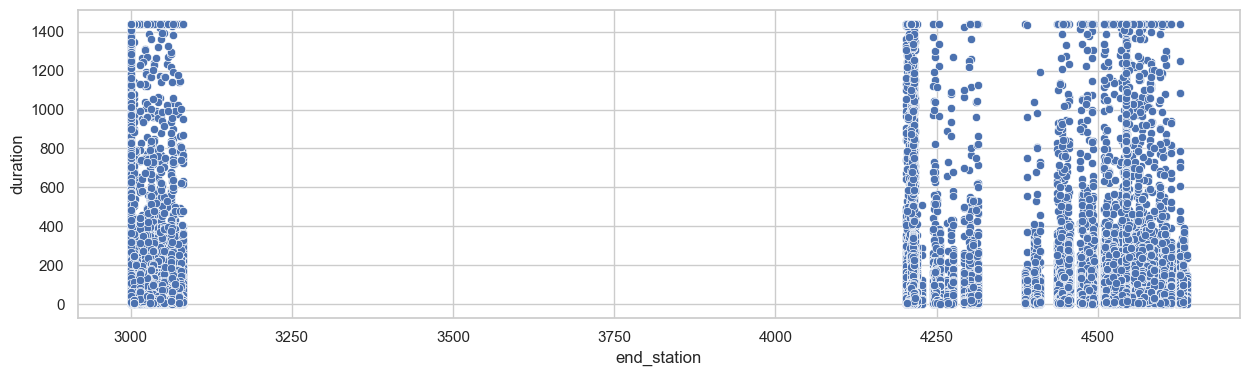

In [39]:
plt.figure(figsize=(15,4))
sns.scatterplot(df, x="end_station", y="duration")
plt.show()

In [40]:
print(df[(df["end_station"]>=2990) & (df["end_station"]<=3100)]["end_station"].nunique(), "\n")
print(np.sort(df[(df["end_station"]>=2990) & (df["end_station"]<=3100)]["end_station"].unique()))

55 

[3000 3005 3006 3007 3008 3010 3011 3014 3016 3018 3019 3020 3022 3023
 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037
 3040 3042 3045 3046 3047 3048 3049 3052 3054 3056 3057 3058 3062 3063
 3064 3065 3066 3068 3069 3074 3075 3076 3077 3078 3079 3081 3082]


In [41]:
print(df[(df["end_station"]>=4100) & (df["end_station"]<=4660)]["end_station"].nunique(), "\n")
print(np.sort(df[(df["end_station"]>=4100) & (df["end_station"]<=4660)]["end_station"].unique()))

181 

[4202 4204 4205 4206 4207 4208 4209 4210 4211 4212 4213 4214 4215 4216
 4217 4220 4227 4245 4246 4247 4248 4249 4250 4254 4255 4266 4267 4273
 4275 4293 4300 4301 4302 4303 4304 4306 4311 4313 4314 4315 4387 4390
 4401 4403 4404 4405 4406 4410 4436 4437 4438 4439 4440 4441 4442 4443
 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453 4454 4455 4456 4457
 4472 4473 4474 4475 4476 4477 4478 4479 4480 4482 4483 4486 4487 4490
 4491 4492 4493 4494 4509 4510 4511 4512 4513 4514 4515 4516 4517 4518
 4521 4523 4524 4525 4526 4527 4528 4529 4534 4536 4537 4538 4539 4540
 4543 4544 4545 4546 4547 4548 4549 4552 4553 4554 4555 4556 4557 4558
 4559 4560 4561 4562 4563 4564 4565 4566 4567 4568 4569 4570 4571 4572
 4573 4575 4576 4577 4578 4579 4580 4581 4582 4583 4584 4587 4595 4596
 4597 4598 4599 4600 4601 4602 4603 4604 4605 4606 4613 4614 4623 4624
 4625 4626 4627 4628 4629 4631 4632 4633 4634 4635 4636 4638 4639]


<h2> Stations with maximum and minimum trip durations (in %)

In [42]:
s_station = ((df.groupby("start_station")["duration"].sum())/(df["duration"].sum())).mul(100).reset_index().sort_values("duration",ascending=False)
display(s_station.head(10), s_station.tail(10))

,start_station,duration
66,4214,10.05
62,4210,5.85
67,4215,5.63
168,4544,4.59
167,4543,3.98
64,4212,2.11
63,4211,1.94
61,4209,1.70
1,3005,1.62
169,4545,1.19


,start_station,duration
232,4638,0.04
13,3023,0.04
223,4625,0.04
0,3000,0.03
224,4626,0.03
221,4623,0.02
19,3029,0.01
226,4628,0.01
228,4631,0.00
222,4624,0.00


<h2>Are there specific stations that experience higher demand during certain season (month)?

In [43]:
pivot_table = df.pivot_table(index='start_station', columns='start_month', aggfunc='size', fill_value=0)
pivot_table['Row Total'] = pivot_table.sum(axis=1)

# Sort by the total
pivot_table = pivot_table.sort_values(by='Row Total', ascending=False)

# Print the pivot table
display(pivot_table.head(10), pivot_table.tail(10))

start_month,April,August,December,February,January,July,June,March,May,November,October,September,Row Total
start_station,,,,,,,,,,,,,
4214,1468,1867,1192,901,890,1902,1492,1194,1621,1217,1676,1753,17173
4215,794,1178,675,622,634,1075,918,794,972,893,1119,1157,10831
4210,731,1195,730,600,564,1035,910,669,1007,838,955,1205,10439
3005,493,659,893,618,513,653,331,508,453,789,944,652,7506
4543,502,671,329,429,422,634,521,489,609,420,589,611,6226
3035,488,494,576,550,555,438,252,447,648,495,666,552,6161
4544,428,610,299,268,247,528,524,363,396,342,524,627,5156
3064,260,563,538,299,324,588,523,297,275,388,419,384,4858
3031,293,403,467,362,380,343,303,276,281,425,575,478,4586


start_month,April,August,December,February,January,July,June,March,May,November,October,September,Row Total
start_station,,,,,,,,,,,,,
3029,13,0,0,11,13,0,31,21,13,0,0,0,102
4638,0,0,68,0,0,0,0,0,0,0,0,0,68
4628,0,0,18,0,0,0,0,0,0,18,16,0,52
4403,0,0,52,0,0,0,0,0,0,0,0,0,52
4626,0,0,0,0,0,40,0,0,0,0,0,0,40
4625,0,0,0,0,0,40,0,0,0,0,0,0,40
3000,1,0,3,1,3,0,1,1,2,2,16,6,36
4623,0,0,0,0,0,25,0,0,0,0,0,0,25
4631,0,4,0,0,0,0,0,0,0,0,0,0,4


<h2> Which plan_duration are taking more round trips?

In [44]:
cross_tab = pd.crosstab(index=df['plan_duration'], columns=df['trip_route_category'])

# Print the cross-tabulation
print(cross_tab)

trip_route_category  One Way  Round Trip
plan_duration                           
1                      78893       35246
30                    128938       18559
365                    25683        2590


<h2> Which plan duration are using more electric bikes?

In [45]:
cross_tab = pd.crosstab(index=df['plan_duration'], columns=df['bike_type'])

# Print the cross-tabulation
print(cross_tab)

bike_type      electric  smart  standard
plan_duration                           
1                 19833      6     94300
30                60064     10     87423
365                7254      0     21019


<h2> Which passholder_type are making more round trips?

In [46]:
cross_tab = pd.crosstab(index=df['passholder_type'], columns=df['trip_route_category'])

# Print the cross-tabulation
print(cross_tab)

trip_route_category  One Way  Round Trip
passholder_type                         
Annual Pass            25683        2590
Monthly Pass          128938       18559
One Day Pass           25380        8841
Walk-up                53513       26405


<h2> Which trip_route_category prefers standard bikes?

In [47]:
cross_tab = pd.crosstab(index=df['trip_route_category'], columns=df['bike_type'])

# Print the cross-tabulation
print(cross_tab)

bike_type            electric  smart  standard
trip_route_category                           
One Way                 71946     15    161553
Round Trip              15205      1     41189


<h2> The most popular day of the week

In [48]:
get_counts("start_day")

,Counts,Percentages
Sunday,46388,16.00
Saturday,46237,15.95
Friday,42635,14.71
Thursday,39368,13.58
Wednesday,38637,13.33
Monday,38358,13.23
Tuesday,38286,13.21


<h3>  ---------------------------- End of the notebook ----------------------------